In [ ]:
## Install Libraries
!pip install --pre pycaret
!pip install feature_engine

In [1]:
##Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm
from termcolor import colored as cl # text customization
from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric
from sklearn.preprocessing import StandardScaler
from pycaret.regression import *

from sklearn.ensemble import RandomForestRegressor


from feature_engine.selection import SelectBySingleFeaturePerformance

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# read csv and stored in dataframe
assignment= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/assignment_rev2.csv')


In [4]:
assignment.head()

,id,ranking_score,agent_id,geography_name,sq_meters,price,year_of_construction,floor,subtype,rooms,...,neoclassic,double_glass,for_commercial_use,fireplace,elevator,satellite,solar_heater,attic,pool,playroom
0,42911697,47.0,14680.0,northern sub,567,200000,2005,1,apartment,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,43018583,134.7,15502.0,northern sub,642,550000,1992,ground-floor,detached,5,...,False,True,False,True,True,False,False,True,False,True
2,39670968,71.0,9807.0,northern sub,320,500000,2009,ground-floor,detached,2,...,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
3,39740833,122.0,14682.0,northern sub,95,230000,2007,1,apartment,3,...,False,True,False,True,True,False,False,False,False,False
4,39742998,126.7,14682.0,northern sub,195,370000,2007,ground-floor,maisonette,4,...,False,True,False,True,True,False,False,False,False,True


In [5]:
## Column names
assignment.columns

Index(['id', 'ranking_score', 'agent_id', 'geography_name', 'sq_meters',
       'price', 'year_of_construction', 'floor', 'subtype', 'rooms',
       'no_of_bathrooms', 'energy_class', 'renovation_year', 'no_of_wc',
       'ad_type', 'living_rooms', 'kitchens', 'balcony_area', 'lux_home',
       'new_development', 'garage', 'furnished', 'preserved', 'investment',
       'unfinished', 'equipped', 'heating_under_floor', 'renovated',
       'requires_renovation', 'airy', 'bright', 'painted', 'garden', 'ac',
       'storage', 'balcony', 'internal_stairs', 'view', 'secure_door',
       'penthouse', 'alarm', 'corner', 'accessible_for_disabled',
       'holiday_home', 'student_home', 'night_power', 'neoclassic',
       'double_glass', 'for_commercial_use', 'fireplace', 'elevator',
       'satellite', 'solar_heater', 'attic', 'pool', 'playroom'],
      dtype='object')

In [6]:
assignment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15447 entries, 0 to 15446
Data columns (total 56 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       15447 non-null  int64  
 1   ranking_score            15447 non-null  float64
 2   agent_id                 15343 non-null  float64
 3   geography_name           15447 non-null  object 
 4   sq_meters                15447 non-null  int64  
 5   price                    15447 non-null  int64  
 6   year_of_construction     15447 non-null  int64  
 7   floor                    14715 non-null  object 
 8   subtype                  15447 non-null  object 
 9   rooms                    15447 non-null  int64  
 10  no_of_bathrooms          15447 non-null  int64  
 11  energy_class             2107 non-null   object 
 12  renovation_year          2067 non-null   float64
 13  no_of_wc                 15447 non-null  int64  
 14  ad_type               

In [7]:
assignment.dtypes

id                           int64
ranking_score              float64
agent_id                   float64
geography_name              object
sq_meters                    int64
price                        int64
year_of_construction         int64
floor                       object
subtype                     object
rooms                        int64
no_of_bathrooms              int64
energy_class                object
renovation_year            float64
no_of_wc                     int64
ad_type                     object
living_rooms                 int64
kitchens                     int64
balcony_area                 int64
lux_home                    object
new_development             object
garage                      object
furnished                   object
preserved                   object
investment                  object
unfinished                  object
equipped                   float64
heating_under_floor         object
renovated                   object
requires_renovation 

# **Assignment Part 1**

In [8]:
#unique values of house type
assignment['subtype'].unique()

array(['apartment', 'detached', 'maisonette', 'building', 'villa',
       'other residential', 'studio', 'apartment complex', 'loft',
       'bungalow', 'houseboat'], dtype=object)

In [9]:
#unique values of area
assignment['geography_name'].unique()

array(['northern sub', 'south beach', 'gentrification area',
       'beesy neighborhood'], dtype=object)

In [10]:
#drop  duplicates 
assignment.drop_duplicates(inplace=True)

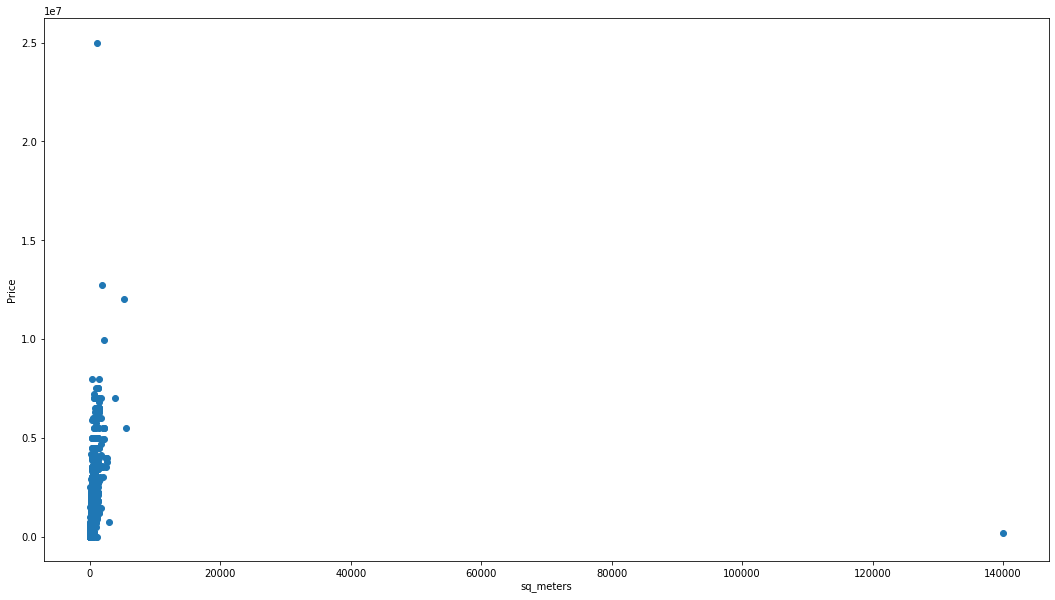

In [11]:
# Scatter plot to monitor outliers of sq_meter and price
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(assignment['sq_meters'], assignment['price'])
 
# x-axis label
ax.set_xlabel('sq_meters')
 
# y-axis label
ax.set_ylabel('Price')
plt.show()

In [12]:
#create a function to find outliers using IQR

def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [13]:
#find outliers of sq_meters column
outliers = find_outliers_IQR(assignment['sq_meters'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: " + str(outliers.min()))

outliers

number of outliers: 839
max outlier value: 140000
min outlier value: 492


0        567
1        642
9        583
37       567
42       500
        ... 
15154    500
15344    722
15371    550
15391    750
15445    800
Name: sq_meters, Length: 839, dtype: int64

In [14]:
#find outliers of price column
outliers = find_outliers_IQR(assignment['price'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: " + str(outliers.min()))

outliers

number of outliers: 1197
max outlier value: 25000000
min outlier value: 1400000


48       2000000
56       2000000
86       2600000
112      1700000
120      1400000
          ...   
14923    1900000
15042    1500000
15160    1500000
15162    1500000
15391    1500000
Name: price, Length: 1197, dtype: int64

In [15]:
outliers = find_outliers_IQR(assignment[["sq_meters","price"]])

outliers

,sq_meters,price
0,567.0,NaN
1,642.0,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
15442,NaN,NaN
15443,NaN,NaN
15444,NaN,NaN
15445,800.0,NaN


In [16]:
# function to replace sq_meters outliers using imputation as if they were missing values
def impute_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   upper = df[~(df>(q3+1.5*IQR))].max()

   lower = df[~(df<(q1-1.5*IQR))].min()

   df = np.where(df > upper,

       df.mean(),

       np.where(

           df < lower,

           df.mean(),

           df

           )

       )

   return df

assignment['sq_meters'] = impute_outliers_IQR(assignment['sq_meters'])

assignment.describe()['sq_meters']

count    15447.000000
mean       169.994674
std        104.753438
min          1.000000
25%         89.000000
50%        140.000000
75%        215.000000
max        490.000000
Name: sq_meters, dtype: float64

In [17]:
# Function to replace price outliers using imputation as if they were missing values
def impute_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   upper = df[~(df>(q3+1.5*IQR))].max()

   lower = df[~(df<(q1-1.5*IQR))].min()

   df = np.where(df > upper,

       df.mean(),

       np.where(

           df < lower,

           df.mean(),

           df

           )

       )

   return df

assignment['price'] = impute_outliers_IQR(assignment['price'])

assignment.describe()['price']

count    1.544700e+04
mean     4.557377e+05
std      2.976086e+05
min      0.000000e+00
25%      2.350000e+05
50%      4.000000e+05
75%      6.000000e+05
max      1.380000e+06
Name: price, dtype: float64

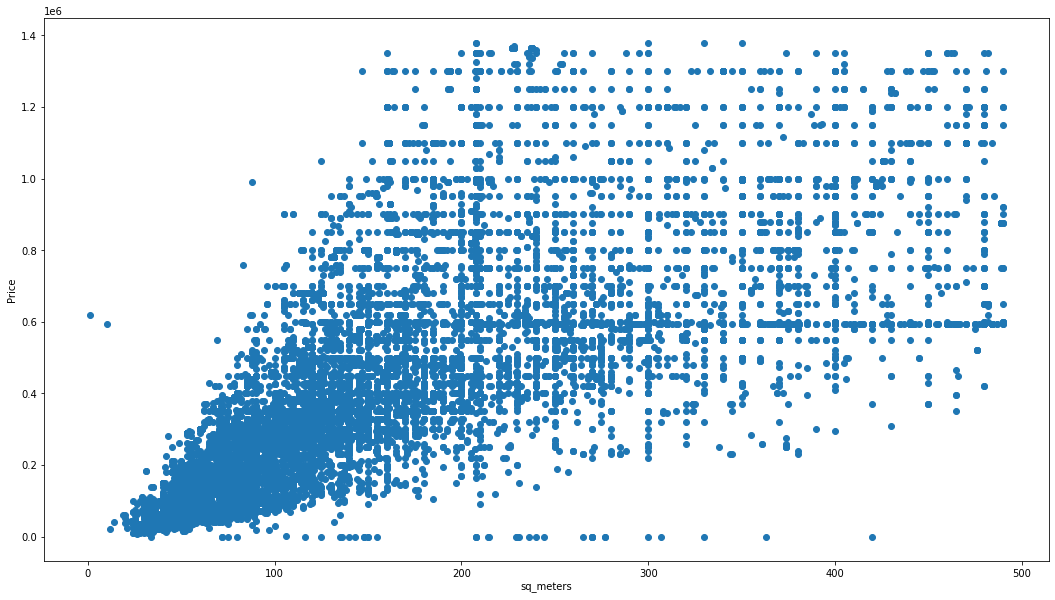

In [18]:
# Scatter plot after impute outliers for sq_meter and price
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(assignment['sq_meters'], assignment['price'])
 
# x-axis label
ax.set_xlabel('sq_meters')
 
# y-axis label
ax.set_ylabel('Price')
plt.show()

In [19]:
assignment.columns

Index(['id', 'ranking_score', 'agent_id', 'geography_name', 'sq_meters',
       'price', 'year_of_construction', 'floor', 'subtype', 'rooms',
       'no_of_bathrooms', 'energy_class', 'renovation_year', 'no_of_wc',
       'ad_type', 'living_rooms', 'kitchens', 'balcony_area', 'lux_home',
       'new_development', 'garage', 'furnished', 'preserved', 'investment',
       'unfinished', 'equipped', 'heating_under_floor', 'renovated',
       'requires_renovation', 'airy', 'bright', 'painted', 'garden', 'ac',
       'storage', 'balcony', 'internal_stairs', 'view', 'secure_door',
       'penthouse', 'alarm', 'corner', 'accessible_for_disabled',
       'holiday_home', 'student_home', 'night_power', 'neoclassic',
       'double_glass', 'for_commercial_use', 'fireplace', 'elevator',
       'satellite', 'solar_heater', 'attic', 'pool', 'playroom'],
      dtype='object')

###  **Final Metrics of mean, median and standard deviation of property prices_per_sq_meter per house type  and per area**

In [20]:
# Calculate prices_per_sq_meter
assignment['prices_per_sq_meter']= assignment['price']/assignment['sq_meters']

In [21]:
## Keep only specific columns
df_as=assignment[['prices_per_sq_meter',"subtype",'geography_name']]

In [22]:
# the mean price per sq_meter per subtype and per area
df_as.groupby(by=["subtype",'geography_name']).mean()

prices_per_sq_meter
subtype           geography_name                          
apartment         beesy neighborhood           1282.380862
                  gentrification area          2623.949468
                  northern sub                 2695.402422
                  south beach                  3384.555267
apartment complex beesy neighborhood           1397.952007
                  gentrification area          3224.567100
                  northern sub                 3479.333682
                  south beach                  3303.813044
building          beesy neighborhood           1717.308150
                  gentrification area          2735.916471
                  northern sub                 2825.926382
                  south beach                  2976.507723
bungalow          south beach                  2216.666667
detached          beesy neighborhood           1583.244306
                  gentrification area          2624.534042
                  northern sub                 2698.348188
                  south beach                  2857.569541
houseboat         beesy neighborhood          59303.949278
loft              gentrification area          2435.897436
                  south beach                  4112.504931
maisonette        beesy neighborhood           1857.890701
                  gentrification area          2620.773702
                  northern sub                 2459.072363
                  south beach                  3911.681585
other residential beesy neighborhood           1346.782812
                  gentrification area          2376.745530
                  northern sub                 3163.963603
                  south beach                  3020.113464
studio            beesy neighborhood           1088.429694
                  gentrification area          2269.693601
                  northern sub                 1921.063921
                  south beach                  2496.024365
villa             northern sub                 3126.914026
                  south beach                  2565.436685

In [23]:
# the std price per sq_meter per subtype and per area
df_as.groupby(by=["subtype",'geography_name']).std()

prices_per_sq_meter
subtype           geography_name                          
apartment         beesy neighborhood            504.933047
                  gentrification area           794.404924
                  northern sub                 1075.331479
                  south beach                  1141.011432
apartment complex beesy neighborhood            676.498880
                  gentrification area            31.375950
                  northern sub                 1397.630284
                  south beach                  1675.649365
building          beesy neighborhood           1233.296997
                  gentrification area          1073.654205
                  northern sub                 1307.620072
                  south beach                  1349.757796
bungalow          south beach                    70.710678
detached          beesy neighborhood            897.187828
                  gentrification area           972.279965
                  northern sub                 1157.903107
                  south beach                  1431.730805
houseboat         beesy neighborhood                   NaN
loft              gentrification area                  NaN
                  south beach                  1268.619334
maisonette        beesy neighborhood            794.970964
                  gentrification area           653.929974
                  northern sub                  877.680561
                  south beach                 17530.342335
other residential beesy neighborhood            642.771248
                  gentrification area           535.766572
                  northern sub                 1118.449604
                  south beach                  1145.652662
studio            beesy neighborhood            603.691350
                  gentrification area           797.151093
                  northern sub                  151.561911
                  south beach                   891.287299
villa             northern sub                 1106.763344
                  south beach                  1102.702691

In [24]:
# fillna to replace the missing values - passing in a DataFrame with the last value of each group.
(df_as.groupby(by=["subtype",'geography_name']).std().fillna(df_as.groupby(by=["subtype",'geography_name']).last()))

prices_per_sq_meter
subtype           geography_name                          
apartment         beesy neighborhood            504.933047
                  gentrification area           794.404924
                  northern sub                 1075.331479
                  south beach                  1141.011432
apartment complex beesy neighborhood            676.498880
                  gentrification area            31.375950
                  northern sub                 1397.630284
                  south beach                  1675.649365
building          beesy neighborhood           1233.296997
                  gentrification area          1073.654205
                  northern sub                 1307.620072
                  south beach                  1349.757796
bungalow          south beach                    70.710678
detached          beesy neighborhood            897.187828
                  gentrification area           972.279965
                  northern sub                 1157.903107
                  south beach                  1431.730805
houseboat         beesy neighborhood          59303.949278
loft              gentrification area          2435.897436
                  south beach                  1268.619334
maisonette        beesy neighborhood            794.970964
                  gentrification area           653.929974
                  northern sub                  877.680561
                  south beach                 17530.342335
other residential beesy neighborhood            642.771248
                  gentrification area           535.766572
                  northern sub                 1118.449604
                  south beach                  1145.652662
studio            beesy neighborhood            603.691350
                  gentrification area           797.151093
                  northern sub                  151.561911
                  south beach                   891.287299
villa             northern sub                 1106.763344
                  south beach                  1102.702691

In [25]:
# the median price per sq_meter per subtype and per area
df_as.groupby(by=["subtype",'geography_name']).median()

prices_per_sq_meter
subtype           geography_name                          
apartment         beesy neighborhood           1141.304348
                  gentrification area          2506.097561
                  northern sub                 2459.016393
                  south beach                  3176.470588
apartment complex beesy neighborhood           1490.066225
                  gentrification area          3224.567100
                  northern sub                 2853.984984
                  south beach                  2853.984984
building          beesy neighborhood           1136.363636
                  gentrification area          2719.298246
                  northern sub                 2494.299128
                  south beach                  2853.984984
bungalow          south beach                  2216.666667
detached          beesy neighborhood           1333.333333
                  gentrification area          2571.428571
                  northern sub                 2619.047619
                  south beach                  2615.384615
houseboat         beesy neighborhood          59303.949278
loft              gentrification area          2435.897436
                  south beach                  4457.142857
maisonette        beesy neighborhood           1666.666667
                  gentrification area          2285.714286
                  northern sub                 2222.222222
                  south beach                  3176.470588
other residential beesy neighborhood           1232.432432
                  gentrification area          2313.725490
                  northern sub                 2853.984984
                  south beach                  2853.984984
studio            beesy neighborhood           1000.000000
                  gentrification area          2265.625000
                  northern sub                 2000.000000
                  south beach                  2317.073171
villa             northern sub                 2853.984984
                  south beach                  2727.272727

In [26]:
## Extra report: Τhere is a library pandas_profiling which provides detailed analysis for each variable
report = ProfileReport(assignment)
#report

# **Assignment Part 2**

# **Assignment Part 3**

## **Preprocessing**

In [27]:
assignment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15447 entries, 0 to 15446
Data columns (total 57 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       15447 non-null  int64  
 1   ranking_score            15447 non-null  float64
 2   agent_id                 15343 non-null  float64
 3   geography_name           15447 non-null  object 
 4   sq_meters                15447 non-null  float64
 5   price                    15447 non-null  float64
 6   year_of_construction     15447 non-null  int64  
 7   floor                    14715 non-null  object 
 8   subtype                  15447 non-null  object 
 9   rooms                    15447 non-null  int64  
 10  no_of_bathrooms          15447 non-null  int64  
 11  energy_class             2107 non-null   object 
 12  renovation_year          2067 non-null   float64
 13  no_of_wc                 15447 non-null  int64  
 14  ad_type               

<Axes: >

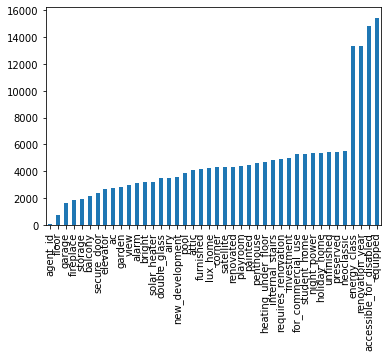

In [28]:
# Plot of missing values
missing = assignment.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [29]:
# summary of misssing values and min and max values
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(assignment.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values * 100
    summ['%missing'] = df.isnull().sum().values / len(df)
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(assignment.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['first value'] = assignment.loc[0].values
    summ['second value'] = assignment.loc[1].values
    summ['third value'] = assignment.loc[2].values
    
    return summ

summary(assignment)

data shape: (15447, 57)


,data type,#missing,%missing,#unique,min,max,first value,second value,third value
id,int64,0,0.000000,15447,34646297.0,43464103.0,42911697,43018583,39670968
ranking_score,float64,0,0.000000,1414,16.0,182.8,47.0,134.7,71.0
agent_id,float64,10400,0.006733,579,5976.0,20017.0,14680.0,15502.0,9807.0
geography_name,object,0,0.000000,4,NaN,NaN,northern sub,northern sub,northern sub
sq_meters,float64,0,0.000000,428,1.0,490.0,207.793487,207.793487,320.0
price,float64,0,0.000000,496,0.0,1380000.0,200000.0,550000.0,500000.0
year_of_construction,int64,0,0.000000,107,0.0,2155.0,2005,1992,2009
floor,object,73200,0.047388,15,NaN,NaN,1,ground-floor,ground-floor
subtype,object,0,0.000000,11,NaN,NaN,apartment,detached,detached
rooms,int64,0,0.000000,28,0.0,255.0,4,5,2


In [30]:
# find NaN of each column
total = assignment.isnull().sum().sort_values(ascending=False)
percent = (assignment.isnull().sum()/assignment.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
equipped,15447,1.000000
accessible_for_disabled,14874,0.962905
renovation_year,13380,0.866188
energy_class,13340,0.863598
neoclassic,5528,0.357869
preserved,5433,0.351719
unfinished,5420,0.350877
holiday_home,5368,0.347511
night_power,5334,0.345310
student_home,5271,0.341231


In [31]:
## Drop non significant columns
assignment=assignment.drop(columns=['agent_id'])

In [32]:
#Data Cleaning function for handling nulls and remove Nulls

def removeNulls(dataframe, axis =1, percent=0.3):
    df = dataframe.copy()
    ishape = df.shape
    if axis == 0:
        rownames = df.transpose().isnull().sum()
        rownames = list(rownames[rownames.values > percent*len(df)].index)
        df.drop(df.index[rownames],inplace=True) 
        print("nNumber of Rows droppedt: ",len(rownames))
    else:
        colnames = (df.isnull().sum()/len(df))
        colnames = list(colnames[colnames.values>=percent].index)
        df.drop(labels = colnames,axis =1,inplace=True)        
        print("Number of Columns droppedt: ",len(colnames))
    print("nOld dataset rows,columns",ishape,"nNew dataset rows,columns",df.shape)
    return df


#Remove columns where NA values are more than or equal to 30% 
#Theoretically, 25 to 30% is the maximum missing values are allowed, beyond which drop the variable
assignment = removeNulls(assignment, axis =1,percent = 0.3)

Number of Columns droppedt:  16
nOld dataset rows,columns (15447, 56) nNew dataset rows,columns (15447, 40)


In [33]:
# find NaN
total = assignment.isnull().sum().sort_values(ascending=False)
percent = (assignment.isnull().sum()/assignment.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
painted,4492,0.290801
playroom,4361,0.282320
renovated,4329,0.280249
satellite,4324,0.279925
corner,4297,0.278177
lux_home,4238,0.274357
furnished,4169,0.269891
attic,4067,0.263287
pool,3900,0.252476
new_development,3606,0.233443


In [34]:
# columns where NaN values have meaning change NaN with None
cols_fillna = ['garage','furnished','elevator',
               'satellite','solar_heater','attic','pool', 'playroom','airy','storage','balcony','new_development','renovated','painted',
               'floor', 'lux_home', 'garden', 'alarm', 'corner', 'elevator', 'furnished', 'double_glass',
               'fireplace', 'attic', 'solar_heater', 'bright','alarm','view', 'garden','ac', 'elevator']

# replace 'NaN' with 'None' in these columns
for col in cols_fillna:
    assignment[col].fillna('None',inplace=True)

In [35]:
# Replacing null values with False for secure_door column
assignment['secure_door'] = assignment['secure_door'].fillna(assignment['secure_door'].value_counts().index[1])

In [43]:
assignment.corr()

,id,ranking_score,sq_meters,price,year_of_construction,rooms,no_of_bathrooms,no_of_wc,living_rooms,kitchens,balcony_area,secure_door,prices_per_sq_meter
id,1.000000,0.146248,-0.245904,-0.263039,-0.095643,-0.103953,-0.157461,-0.125670,0.037492,0.057227,0.008958,-0.028756,-0.046495
ranking_score,0.146248,1.000000,0.070896,0.087464,0.210860,0.047788,0.232132,0.137444,0.201142,0.338736,0.162842,0.321791,0.019631
sq_meters,-0.245904,0.070896,1.000000,0.688650,0.046391,0.361560,0.515979,0.343253,0.099761,0.150636,0.062119,0.046721,-0.040288
price,-0.263039,0.087464,0.688650,1.000000,0.078820,0.317530,0.453229,0.338284,0.056657,0.092485,0.075143,0.147877,0.144975
year_of_construction,-0.095643,0.210860,0.046391,0.078820,1.000000,0.032654,0.087187,0.062749,0.000889,0.009024,0.023224,0.091312,0.015276
rooms,-0.103953,0.047788,0.361560,0.317530,0.032654,1.000000,0.370478,0.312154,0.102632,0.178723,0.035506,0.050632,0.008187
no_of_bathrooms,-0.157461,0.232132,0.515979,0.453229,0.087187,0.370478,1.000000,0.353864,0.221500,0.356093,0.103011,0.204066,0.011427
no_of_wc,-0.125670,0.137444,0.343253,0.338284,0.062749,0.312154,0.353864,1.000000,0.130456,0.210251,0.066497,0.191658,0.025929
living_rooms,0.037492,0.201142,0.099761,0.056657,0.000889,0.102632,0.221500,0.130456,1.000000,0.550360,0.142147,0.071307,-0.006766
kitchens,0.057227,0.338736,0.150636,0.092485,0.009024,0.178723,0.356093,0.210251,0.550360,1.000000,0.152128,0.131770,-0.009439


In [44]:
# Enccode floor categorical values by using ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
assignment["nfloor"] = ord_enc.fit_transform(assignment[["floor"]])
assignment[["floor",'nfloor']].head(11)

,floor,nfloor
0,1,0.0
1,ground-floor,13.0
2,ground-floor,13.0
3,1,0.0
4,ground-floor,13.0
5,ground-floor,13.0
6,ground-floor,13.0
7,None,11.0
8,ground-floor,13.0
9,ground-floor,13.0


In [45]:
# Enccode categorical values by using ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
assignment["nsubtype"] = ord_enc.fit_transform(assignment[["subtype"]])
assignment[["subtype",'nsubtype']].head(11)


,subtype,nsubtype
0,apartment,0.0
1,detached,4.0
2,detached,4.0
3,apartment,0.0
4,maisonette,7.0
5,detached,4.0
6,maisonette,7.0
7,detached,4.0
8,detached,4.0
9,detached,4.0


In [69]:
# Enccode categorical values by using ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
assignment['ngeography_name'] = ord_enc.fit_transform(assignment[["geography_name"]])
assignment[["geography_name",'ngeography_name']].head(11)


,geography_name,ngeography_name
0,northern sub,2.0
1,northern sub,2.0
2,northern sub,2.0
3,northern sub,2.0
4,northern sub,2.0
5,northern sub,2.0
6,northern sub,2.0
7,northern sub,2.0
8,northern sub,2.0
9,northern sub,2.0


In [46]:
# Enccode categorical values by using ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
assignment["nsecure_door"] = ord_enc.fit_transform(assignment[["secure_door"]])
assignment[["secure_door",'nsecure_door']].head(11)

,secure_door,nsecure_door
0,False,0.0
1,False,0.0
2,False,0.0
3,True,1.0
4,True,1.0
5,True,1.0
6,False,0.0
7,True,1.0
8,True,1.0
9,False,0.0


### **Feature Selection:Identify the most important attributes in predicting the price of a property.**


In [158]:
# split the dataset to features and target and change the feature types to string in order to insert them to the model
X_f=assignment.drop(columns=['price']).astype(str)
y_f=assignment['price']

,id,ranking_score,geography_name,sq_meters,year_of_construction,floor,subtype,rooms,no_of_bathrooms,no_of_wc,...,satellite,solar_heater,attic,pool,playroom,prices_per_sq_meter,nfloor,nsubtype,nsecure_door,ngeography_name
0,11991,887,2,114,89,0,0,21,0,0,...,1,1,1,1,1,3558,0,0,0,2
1,12774,347,2,114,76,13,4,22,12,1,...,0,0,2,0,2,1730,5,5,0,2
2,2736,1123,2,231,93,13,4,11,8,1,...,1,1,1,1,1,556,5,5,0,2
3,2829,220,2,423,91,0,0,18,1,1,...,0,0,0,0,0,1495,0,0,1,2
4,2835,267,2,100,91,13,7,21,1,6,...,0,0,0,0,2,917,5,8,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15442,13235,10,0,408,44,5,0,11,0,0,...,0,0,0,0,0,3533,11,0,0,0
15443,13236,35,0,397,59,3,0,11,0,0,...,0,0,0,0,0,9,9,0,0,0
15444,13238,181,0,403,58,5,0,1,1,0,...,0,0,0,0,0,598,11,0,1,0
15445,4003,1200,0,114,17,13,2,1,0,0,...,0,0,0,0,0,1954,5,3,0,0


In [99]:
# Encode categorical variables

for col in X_f.columns:
    X_f[col] = LabelEncoder().fit_transform(X_f[col])

y_f = LabelEncoder().fit_transform(y_f)

In [93]:
## Feature Selection using Random Forest regressor using R2 scoring




# Separate data into train and test sets
X_ftrain, X_ftest, y_ftrain, y_ftest = train_test_split(X_f, y_f, random_state=0)

sel = SelectBySingleFeaturePerformance(
    estimator=RandomForestRegressor(max_depth=2, random_state=0),
    scoring='r2',
    cv=3,
    threshold=None,
)

X_train_t = sel.fit_transform(X_ftrain, y_ftrain)
X_test_t = sel.transform(X_ftest)



fp=pd.Series(sel.feature_performance_).sort_values(
    ascending=False)


In [94]:
fp

rooms                   0.463211
sq_meters               0.445068
ngeography_name         0.406858
geography_name          0.406858
no_of_bathrooms         0.395234
nsubtype                0.336544
subtype                 0.305190
fireplace               0.288410
year_of_construction    0.267803
garage                  0.264099
prices_per_sq_meter     0.211174
no_of_wc                0.195914
storage                 0.168747
floor                   0.164560
garden                  0.160345
nfloor                  0.160040
alarm                   0.138708
id                      0.131572
playroom                0.110979
pool                    0.106929
lux_home                0.088861
living_rooms            0.073933
kitchens                0.066735
balcony                 0.040743
satellite               0.040276
new_development         0.040228
ac                      0.038843
attic                   0.036790
view                    0.036009
nsecure_door            0.034265
secure_doo

As the above shows the most important variables for the price prediction is:
the rooms,
sq_meters, 
geography_name= area
no_of_bathrooms,
subtype, 
year_of_construction, 
fireplace,
garage,
prices_per_sq_meter,  
no_of_wc,
storage,
floor,
garden,
nfloor,
alarm,
playroom,
pool

Text(0.5, 1.0, 'Univariate performance')

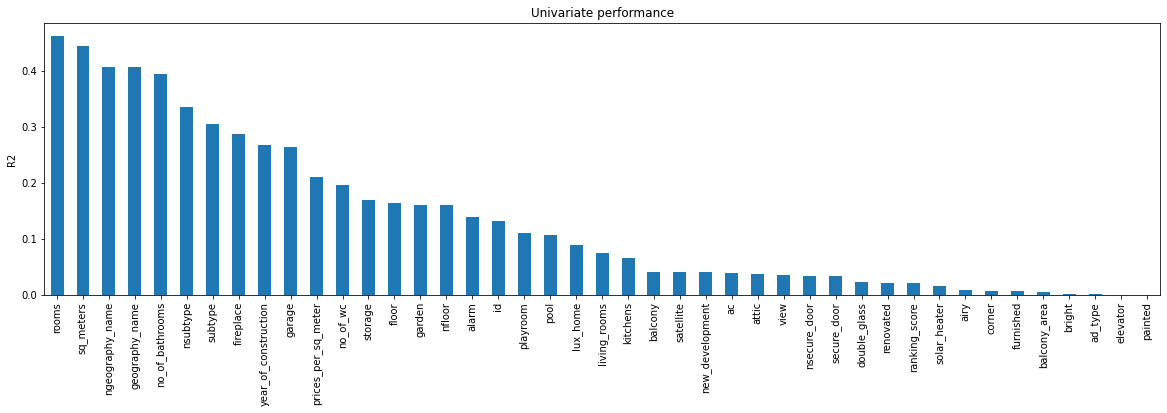

In [95]:
#some visualization to explore the importance of the features based on the single feature regressors:
fp.plot.bar(figsize=(20, 5))

plt.ylabel('R2')
plt.title('Univariate performance')

# **Machine Learning Algorithms for price prediction**

In [136]:
#Move price column in the end of the dataframe
assignment=assignment[[c for c in assignment if c not in ['price']] 
       + ['price']]

In [137]:
#Drop price values <10000
assignment.drop(assignment[assignment['price'] <=10000.0 ].index, inplace = True)

In [139]:
X=assignment[['rooms', 'sq_meters', 'geography_name', 'subtype', 'year_of_construction', 'fireplace', 'garage', 'prices_per_sq_meter',
'no_of_wc', 'storage', 'floor', 'garden', 'nfloor', 'alarm', 'playroom', 'pool']]

In [140]:
# split the dataset into # retrieve the array of data
data = assignment.values
# separate into input and output columns
#X=assignment.drop(columns=['price']).astype(str)
#y=assignment['price'].astype(str)

X = data[:, :-1].astype(str)
y = data[:, -1]
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)



In [141]:
# ordinal encode input variables
ordinal_encoder = OrdinalEncoder()
#ordinal_encoder.fit(X_train)
X_train = ordinal_encoder.fit_transform(X_train)
X_test = ordinal_encoder.fit_transform(X_test)
# ordinal encode target variable

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)


In [142]:
# Machne Learning MODELING

# 1. OLS

ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)

# 2. Ridge

ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
ridge_yhat = ridge.predict(X_test)

# 3. Lasso

lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)
lasso_yhat = lasso.predict(X_test)

# 4. Bayesian

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

# 5. ElasticNet

en = ElasticNet(alpha = 0.01)
en.fit(X_train, y_train)
en_yhat = en.predict(X_test)

In [144]:
# 1. Explained Variance Score

print(cl('EXPLAINED VARIANCE SCORE:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of OLS model is {}'.format(evs(y_test, ols_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Ridge model is {}'.format(evs(y_test, ridge_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Lasso model is {}'.format(evs(y_test, lasso_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Bayesian model is {}'.format(evs(y_test, bayesian_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of ElasticNet is {}'.format(evs(y_test, en_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')



EXPLAINED VARIANCE SCORE:
-------------------------------------------------------------------------------
Explained Variance Score of OLS model is 0.7054637598840195
-------------------------------------------------------------------------------
Explained Variance Score of Ridge model is 0.7054659233546339
-------------------------------------------------------------------------------
Explained Variance Score of Lasso model is 0.7055109901855381
-------------------------------------------------------------------------------
Explained Variance Score of Bayesian model is 0.706087964315694
-------------------------------------------------------------------------------
Explained Variance Score of ElasticNet is 0.7057106524216589
-------------------------------------------------------------------------------
Explained Variance Score of ltd is 0.13827990954007552
-------------------------------------------------------------------------------


In [145]:
# 2. R-squared

print(cl('R-SQUARED:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of OLS model is {}'.format(r2(y_test, ols_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Ridge model is {}'.format(r2(y_test, ridge_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Lasso model is {}'.format(r2(y_test, lasso_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Bayesian model is {}'.format(r2(y_test, bayesian_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of ElasticNet is {}'.format(r2(y_test, en_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')



R-SQUARED:
-------------------------------------------------------------------------------
R-Squared of OLS model is 0.591727333445617
-------------------------------------------------------------------------------
R-Squared of Ridge model is 0.5917307304644208
-------------------------------------------------------------------------------
R-Squared of Lasso model is 0.5918416085200999
-------------------------------------------------------------------------------
R-Squared of Bayesian model is 0.5927441369523623
-------------------------------------------------------------------------------
R-Squared of ElasticNet is 0.5921140998127102
-------------------------------------------------------------------------------
R-Squared of ElasticNet is -0.04243303926788311
-------------------------------------------------------------------------------


## **Comparison of Regression Algorithms to predict Price by usin Pycaret Library**

In [159]:
# Encode categorical variables
assignment=assignment.astype(str)
for col in assignment.columns:
    assignment[col] = LabelEncoder().fit_transform(assignment[col])

### Below use of setup() function, it needs to be called before to do anything on Pycaret. This function initializes the environment inside Pycaret and prepares the data for modelling and deployment.

### Inside the setup() function, only two parameters are mandatory, namely ‘data’ that takes the name of the dataframe and ‘target’ taking the name of the target column.

### Session_id can be any number and for some reason, if encountering an error at this step, changing the session_id helps.

### Categorical_features is also optional as the Pycaret self detects the datatypes

### After running this statement  the features be presented with their detected datatypes.

In [163]:
#Prepare setup function and use as features the ones that feature selection gave
caret_df = setup(data = assignment, target = 'price', session_id=55, categorical_features =['rooms', 'sq_meters', 'geography_name', 'subtype', 'year_of_construction', 'fireplace', 'garage', 'prices_per_sq_meter','no_of_wc', 'storage', 'floor', 'garden', 'nfloor', 'alarm', 'playroom', 'pool'] ) 

,Description,Value
0,Session id,55
1,Target,price
2,Target type,Regression
3,Original data shape,"(15402, 44)"
4,Transformed data shape,"(15402, 44)"
5,Transformed train set shape,"(10781, 44)"
6,Transformed test set shape,"(4621, 44)"
7,Numeric features,43
8,Categorical features,16
9,Preprocess,True


### Below the compare_models function is used. This function will list the twenty regression models with the MAE, MSE, RMSE, R2, RMSLE, MAPE values in the descending order of R2 (R²). This function assumes the K-fold cross-validation to be 10. The results you see are the average of the 10 experiments with different test sets. 
###This will give us the following results:

In [164]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,13.6400,1942.8050,43.9365,0.8887,0.6618,2.0486,9.1860
lightgbm,Light Gradient Boosting Machine,22.4158,2457.7419,49.5054,0.8592,0.7339,2.6415,0.5020
xgboost,Extreme Gradient Boosting,23.8283,2602.9109,50.9374,0.8507,0.7326,2.4808,3.0040
et,Extra Trees Regressor,24.7775,3116.8891,55.7623,0.8215,0.7794,3.1479,8.2770
dt,Decision Tree Regressor,12.8476,3617.0638,59.6505,0.7930,0.6803,1.5180,0.2810
gbr,Gradient Boosting Regressor,54.2668,7080.4488,84.1157,0.5941,0.9177,4.5320,2.9100
ada,AdaBoost Regressor,82.7089,10891.6213,104.3196,0.3758,0.9887,4.9531,0.5910
knn,K Neighbors Regressor,88.5890,14384.8537,119.9115,0.1752,1.0240,5.1804,0.2060
br,Bayesian Ridge,100.4502,15546.8752,124.6580,0.1089,1.0555,5.7612,0.1630
lasso,Lasso Regression,100.5665,15549.7040,124.6695,0.1088,1.0554,5.7533,0.3030


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

RandomForestRegressor(n_jobs=-1, random_state=55)

# **Create individual model**
### To look at a single model, the random forest is chosen ‘random forest’ as o top performance model , and use of create_model() function.

In [166]:
forest_reg = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,14.0882,2015.5494,44.8949,0.8852,0.6993,2.1664
1,14.5970,2257.1351,47.5093,0.8699,0.7287,3.1328
2,13.9108,2185.2653,46.7468,0.8748,0.6589,2.5300
3,14.2476,2222.8511,47.1471,0.8773,0.7270,2.1822
4,12.4500,1510.6115,38.8666,0.9153,0.5854,1.5952
5,14.5059,2294.4526,47.9004,0.8690,0.6685,2.0316
6,14.7525,2052.2796,45.3021,0.8898,0.7444,2.7617
7,13.5450,1824.0634,42.7091,0.8876,0.6400,1.9401
8,12.0416,1595.1195,39.9389,0.9057,0.5562,0.8348


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

#**Tune the Hyperparameter**
###After analysed the individual models. PyCaret also helps to tune a model. I will tune the random forest as this is the best model for the dataset. By default Pycaret uses RandomGridSearch from the sklearn.

In [169]:
tuned_freg = tune_model(forest_reg)
print(tuned_freg)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,28.3238,4304.7320,65.6105,0.7548,0.7418,3.3031
1,23.0989,3971.2879,63.0182,0.7711,0.6978,3.5610
2,30.9537,5505.9890,74.2024,0.6845,0.7889,4.6177
3,21.4719,3300.2032,57.4474,0.8179,0.6446,1.5693
4,19.8625,2233.7172,47.2622,0.8748,0.5455,1.0685
5,28.0327,4367.3406,66.0859,0.7506,0.7219,3.3494
6,27.8955,4774.4924,69.0977,0.7435,0.7724,3.8543
7,25.5818,3610.6783,60.0889,0.7776,0.6498,2.7880
8,27.8440,4628.3023,68.0316,0.7264,0.6999,2.1211


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
RandomForestRegressor(n_jobs=-1, random_state=55)


#**Visualize the model**

### Another big plus of the pyCaret is that it gives us the powerful interactive output to visualize the models and look at different graphs like Residual plots, Prediction error plots, feature importance etc.



In [ ]:
#Visualize and evaluate the model
evaluate_model(tuned_freg)

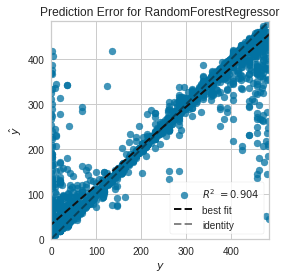

In [171]:
#Prediction Error Plot
plot_model(tuned_freg, plot = 'error')

# **Predict on Test / Hold-out Sample**
### Before finalizing the model, it is advisable to perform one final check by predicting the test/hold-out set and reviewing the evaluation metrics.  Using the final trained model stored in the tuned_freg, we will predict the hold-out sample and evaluate the metrics to see if they are materially different than the CV results.

In [172]:
#Predict on Test / Hold-out Sample

predict_model(tuned_freg);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,12.2775,1641.3662,40.5138,0.9035,0.6050,1.8270


#**Finalize Model for Deployment**
####Model finalization is the last step.

####The finalize_model function fits the model onto the complete dataset including the test/hold-out sample. The purpose of this function is to train the model on the complete dataset before it is deployed in production.

In [173]:
# Finalize Model for Deployment
final_freg = finalize_model(tuned_freg)
print(final_freg)

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['id', 'ranking_score',
                                             'geography_name', 'sq_meters',
                                             'year_of_construction', 'floor',
                                             'subtype', 'rooms',
                                             'no_of_bathrooms', 'no_of_wc',
                                             'ad_type', 'living_rooms',
                                             'kitchens', 'balcony_area',
                                             'lux_home', 'new_development',
                                             'garage', 'furnished', 'renovated',
                                             'air...
                                             'playroom', 'pool'],
                                    transformer=OneHotEncoder(cols=[],
                                                         

In order to demonstrate this point only, I will use final_freg under predict_model to compare the information grid.



In [174]:
predict_model(final_freg)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,3.8924,196.1208,14.0043,0.9885,0.4229,0.5731


,id,ranking_score,geography_name,sq_meters,year_of_construction,floor,subtype,rooms,no_of_bathrooms,no_of_wc,...,attic,pool,playroom,prices_per_sq_meter,nfloor,nsubtype,nsecure_door,ngeography_name,price,prediction_label
10781,3461,356,2,125,60,9,0,22,11,1,...,0,0,0,1086,9,0,1,2,290,288.61
10782,13064,211,3,37,78,12,8,0,0,0,...,0,0,0,2884,12,8,0,3,388,379.55
10783,7787,350,3,341,89,5,2,23,11,1,...,0,0,0,287,5,2,1,3,355,355.00
10784,3789,1164,3,366,58,7,0,1,1,0,...,0,0,1,572,7,0,1,3,464,400.83
10785,8179,1375,2,416,67,11,9,12,1,1,...,0,0,0,2182,11,9,1,2,216,219.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15397,6463,279,3,29,96,0,0,21,10,1,...,0,0,0,1922,0,0,1,3,263,262.80
15398,4558,591,2,258,101,5,8,23,1,0,...,1,1,1,617,5,8,0,2,355,354.65
15399,13730,1319,2,130,78,9,0,22,10,1,...,0,0,0,2234,9,0,0,2,406,402.03
15400,6844,501,0,411,45,0,0,1,0,0,...,1,1,1,598,0,0,0,0,86,86.04
